In [117]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [110]:
# collected data
green = np.loadtxt('green_led_data.csv', skiprows=1, delimiter=',')
vr_green = -1*green[:,2]   # volts
vd_green = -1*green[:,3]   # volts

green_rgb = np.loadtxt('green_rgb_data.csv', skiprows=1, delimiter=',')
vr_g_rgb = green_rgb[:,2]   # volts
vd_g_rgb = green_rgb[:,3]   # volts

blue = np.loadtxt('blue_led_data.csv', skiprows=1, delimiter=',')
vr_blue = -1*blue[:,2]   # volts
vd_blue = -1*blue[:,3]   # volts

blue_rgb = np.loadtxt('blue_rgb_data.csv', skiprows=1, delimiter=',')
vr_b_rgb = blue_rgb[:,2]   # volts
vd_b_rgb = blue_rgb[:,3]   # volts

red = np.loadtxt('red_led_data.csv', skiprows=1, delimiter=',')
vr_red = -1*red[:,2]   # volts
vd_red = -1*red[:,3]   # volts

red_rgb = np.loadtxt('red_rgb_data.csv', skiprows=1, delimiter=',')
vr_r_rgb = red_rgb[:,2]   # volts
vd_r_rgb = red_rgb[:,3]   # volts

yellow = np.loadtxt('yellow_led_data.csv', skiprows=1, delimiter=',')
vr_yellow = -1*yellow[:,2]   # volts
vd_yellow = -1*yellow[:,3]   # volts

white = np.loadtxt('white_led_data.csv', skiprows=1, delimiter=',')
vr_white = -1*white[:,2]   # volts
vd_white = -1*white[:,3]   # volts

we_diode = np.loadtxt('we_diode_data.csv', skiprows=1, delimiter=',')
vr_we = we_diode[:,2]   # volts
vd_we = we_diode[:,3]   # volts

ge_shottky = np.loadtxt('ge_shottky_diode_data.csv', skiprows=1, delimiter=',')
vr_ge = ge_shottky[:,2]   # volts
vd_ge = ge_shottky[:,3]   # volts

n4148 = np.loadtxt('1n4148_diode_data.csv', skiprows=1, delimiter=',')
vr_n = n4148[:,2]   # volts
vd_n = n4148[:,3]   # volts

In [111]:
# calculate current --> vr = i * R
r = 327   # Ohms

#i = vr / r
i_green = vr_green / r
i_g_rgb = vr_g_rgb / r
i_blue = vr_blue / r
i_b_rgb = vr_b_rgb / r
i_red = vr_red / r
i_r_rgb = vr_r_rgb / r
i_yellow = vr_yellow / r
i_white = vr_white / r
i_we = vr_we / r
i_ge = vr_ge / r
i_n = vr_n / r

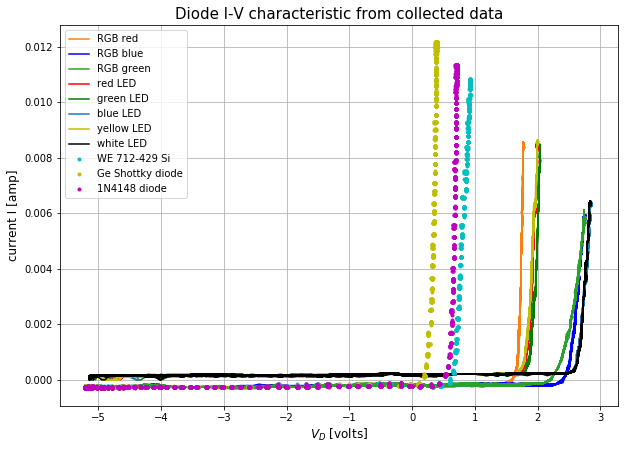

In [189]:
plt.figure(figsize=(10,7))
plt.title('Diode I-V characteristic from collected data', fontsize=15)
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_r_rgb,i_r_rgb,'C1-', label='RGB red')
plt.plot(vd_b_rgb,i_b_rgb,'b-', label='RGB blue')
plt.plot(vd_g_rgb,i_g_rgb,'C2-', label='RGB green')

plt.plot(vd_red,i_red,'r-', label='red LED')
plt.plot(vd_green,i_green,'g-', label='green LED')
plt.plot(vd_blue,i_blue,'C0-', label='blue LED')
plt.plot(vd_yellow,i_yellow,'y-', label='yellow LED')
plt.plot(vd_white,i_white,'k-', label='white LED')

plt.plot(vd_we,i_we,'c.', label='WE 712-429 Si')
plt.plot(vd_ge,i_ge,'y.', label='Ge Shottky diode')
plt.plot(vd_n,i_n,'m.', label='1N4148 diode')

plt.legend()
plt.grid()

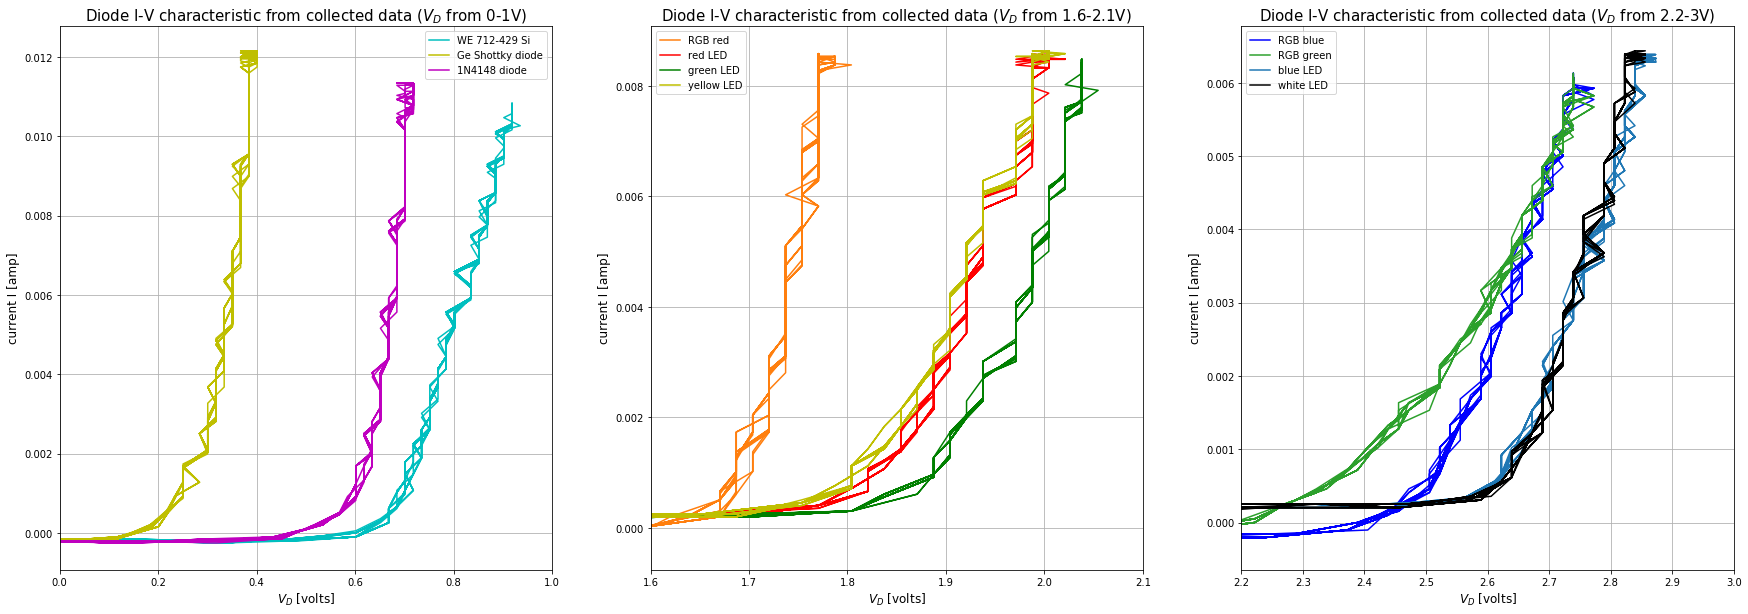

In [187]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.title('Diode I-V characteristic from collected data ($V_D$ from 0-1V)', fontsize=15)
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.xlim(0,1)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_we,i_we,'c-', label='WE 712-429 Si')
plt.plot(vd_ge,i_ge,'y-', label='Ge Shottky diode')
plt.plot(vd_n,i_n,'m-', label='1N4148 diode')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.title('Diode I-V characteristic from collected data ($V_D$ from 1.6-2.1V)', fontsize=15)
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.xlim(1.6,2.1)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_r_rgb,i_r_rgb,'C1-', label='RGB red')

plt.plot(vd_red,i_red,'r-', label='red LED')
plt.plot(vd_green,i_green,'g-', label='green LED')
plt.plot(vd_yellow,i_yellow,'y-', label='yellow LED')

plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.title('Diode I-V characteristic from collected data ($V_D$ from 2.2-3V)', fontsize=15)
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.xlim(2.2,3)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_b_rgb,i_b_rgb,'b-', label='RGB blue')
plt.plot(vd_g_rgb,i_g_rgb,'C2-', label='RGB green')

plt.plot(vd_blue,i_blue,'C0-', label='blue LED')
plt.plot(vd_white,i_white,'k-', label='white LED')

plt.legend()
plt.grid()

In [190]:
def findFit(vd, i):
    lin_i_indices = np.asarray(np.where(i > 0.002))
    num_pts = lin_i_indices.size
    lin_vd = np.zeros(num_pts)
    lin_i = np.zeros(num_pts)
    
    for j in range(num_pts):
        current_index = lin_i_indices[0,j]
        lin_vd[j] = vd[current_index]
        lin_i[j] = i[current_index]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(lin_vd, lin_i)
    line = (slope * lin_vd) + intercept
    
    return  line, lin_vd, slope, intercept

In [195]:
# linear fit to region where current > 0.002amp
fit_b_rgb = findFit(vd_b_rgb,i_b_rgb)
# vt = x-intercept of linear fit = (-y-intercept)/slope
vt_b_rgb = (-1*fit_b_rgb[3])/fit_b_rgb[2]
# Rd = 1 / slope
rd_b_rgb = 1 / fit_b_rgb[2]

print('RGB BLUE')
print('vt =', np.round(vt_b_rgb, 3), 'V')
print('Rd =', np.round(rd_b_rgb, 3), 'Ohms')
#print('\n')

RGB BLUE
vt = 2.519 V
Rd = 37.3 Ohms


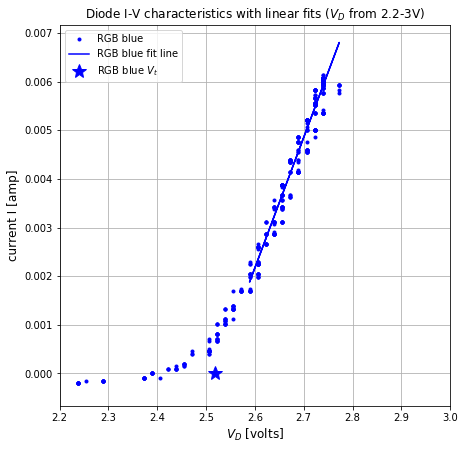

In [196]:
plt.figure(figsize=(7,7))
plt.title('Diode I-V characteristics with linear fits ($V_D$ from 2.2-3V)')
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.xlim(2.2,3)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_b_rgb,i_b_rgb,'b.', label='RGB blue')
plt.plot(fit_b_rgb[1],fit_b_rgb[0],'b-', label='RGB blue fit line')
plt.plot(vt_b_rgb, 0, 'b*', markersize=15,label='RGB blue $V_t$')

plt.legend()
plt.grid()

In [199]:
fit_b_rgb = findFit(vd_b_rgb,i_b_rgb)
vt_b_rgb = (-1*fit_b_rgb[3])/fit_b_rgb[2]
rd_b_rgb = 1 / fit_b_rgb[2]
print('RGB BLUE')
print('vt =', np.round(vt_b_rgb, 3), 'V')
print('Rd =', np.round(rd_b_rgb, 3), 'Ohms')
#print('\n')

fit_g_rgb = findFit(vd_g_rgb,i_g_rgb)
vt_g_rgb = (-1*fit_g_rgb[3])/fit_g_rgb[2]
rd_g_rgb = 1 / fit_g_rgb[2]
print('RGB GREEN')
print('vt =', np.round(vt_g_rgb, 3), 'V')
print('Rd =', np.round(rd_g_rgb, 3), 'Ohms')
#print('\n')

fit_blue = findFit(vd_blue,i_blue)
vt_blue = (-1*fit_blue[3])/fit_blue[2]
rd_blue = 1 / fit_blue[2]
print('BLUE LED')
print('vt =', np.round(vt_blue, 3), 'V')
print('Rd =', np.round(rd_blue, 3), 'Ohms')
#print('\n')

fit_white = findFit(vd_white,i_white)
vt_white = (-1*fit_white[3])/fit_white[2]
rd_white = 1 / fit_white[2]
print('WHITE LED')
print('vt =', np.round(vt_white, 3), 'V')
print('Rd =', np.round(rd_white, 3), 'Ohms')
print('\n')



fit_r_rgb = findFit(vd_r_rgb,i_r_rgb)
vt_r_rgb = (-1*fit_r_rgb[3])/fit_r_rgb[2]
rd_r_rgb = 1 / fit_r_rgb[2]
print('RGB RED')
print('vt =', np.round(vt_r_rgb, 3), 'V')
print('Rd =', np.round(rd_r_rgb, 3), 'Ohms')
#print('\n')

fit_green = findFit(vd_green,i_green)
vt_green = (-1*fit_green[3])/fit_green[2]
rd_green = 1 / fit_green[2]
print('GREEN LED')
print('vt =', np.round(vt_green, 3), 'V')
print('Rd =', np.round(rd_green, 3), 'Ohms')
#print('\n')

fit_red = findFit(vd_red,i_red)
vt_red = (-1*fit_red[3])/fit_red[2]
rd_red = 1 / fit_red[2]
print('RED LED')
print('vt =', np.round(vt_red, 3), 'V')
print('Rd =', np.round(rd_red, 3), 'Ohms')
#print('\n')

fit_yellow = findFit(vd_yellow,i_yellow)
vt_yellow = (-1*fit_yellow[3])/fit_yellow[2]
rd_yellow = 1 / fit_yellow[2]
print('YELLOW LED')
print('vt =', np.round(vt_yellow, 3), 'V')
print('Rd =', np.round(rd_yellow, 3), 'Ohms')
print('\n')



fit_we = findFit(vd_we,i_we)
vt_we = (-1*fit_we[3])/fit_we[2]
rd_we = 1 / fit_we[2]
print('WE 712-429 Si')
print('vt =', np.round(vt_we, 3), 'V')
print('Rd =', np.round(rd_we, 3), 'Ohms')
#print('\n')

fit_ge = findFit(vd_ge,i_ge)
vt_ge = (-1*fit_ge[3])/fit_ge[2]
rd_ge = 1 / fit_ge[2]
print('Ge Shottky diode')
print('vt =', np.round(vt_ge, 3), 'V')
print('Rd =', np.round(rd_ge, 3), 'Ohms')
#print('\n')

fit_n = findFit(vd_n,i_n)
vt_n = (-1*fit_n[3])/fit_n[2]
rd_n = 1 / fit_n[2]
print('1N4148 diode')
print('vt =', np.round(vt_n, 3), 'V')
print('Rd =', np.round(rd_n, 3), 'Ohms')
print('\n')

RGB BLUE
vt = 2.519 V
Rd = 37.3 Ohms
RGB GREEN
vt = 2.442 V
Rd = 51.043 Ohms
BLUE LED
vt = 2.628 V
Rd = 36.173 Ohms
WHITE LED
vt = 2.643 V
Rd = 30.807 Ohms


RGB RED
vt = 1.696 V
Rd = 9.522 Ohms
GREEN LED
vt = 1.904 V
Rd = 16.606 Ohms
RED LED
vt = 1.837 V
Rd = 19.631 Ohms
YELLOW LED
vt = 1.82 V
Rd = 21.137 Ohms


WE 712-429 Si
vt = 0.682 V
Rd = 22.458 Ohms
Ge Shottky diode
vt = 0.281 V
Rd = 9.677 Ohms
1N4148 diode
vt = 0.615 V
Rd = 9.308 Ohms




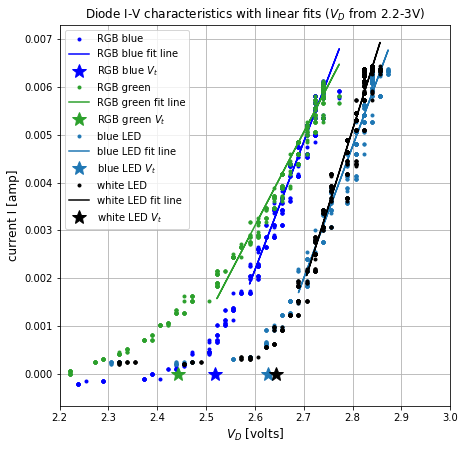

In [198]:
plt.figure(figsize=(7,7))
plt.title('Diode I-V characteristics with linear fits ($V_D$ from 2.2-3V)')
plt.xlabel('$V_D$ [volts]', fontsize=12)
plt.xlim(2.2,3)
plt.ylabel('current I [amp]', fontsize=12)

plt.plot(vd_b_rgb,i_b_rgb,'b.', label='RGB blue')
plt.plot(fit_b_rgb[1],fit_b_rgb[0],'b-', label='RGB blue fit line')
plt.plot(vt_b_rgb, 0, 'b*', markersize=15,label='RGB blue $V_t$')

plt.plot(vd_g_rgb,i_g_rgb,'C2.', label='RGB green')
plt.plot(fit_g_rgb[1],fit_g_rgb[0],'C2-', label='RGB green fit line')
plt.plot(vt_g_rgb, 0, 'C2*', markersize=15,label='RGB green $V_t$')

plt.plot(vd_blue,i_blue,'C0.', label='blue LED')
plt.plot(fit_blue[1],fit_blue[0],'C0-', label='blue LED fit line')
plt.plot(vt_blue, 0, 'C0*', markersize=15,label='blue LED $V_t$')

plt.plot(vd_white,i_white,'k.', label='white LED')
plt.plot(fit_white[1],fit_white[0],'k-', label='white LED fit line')
plt.plot(vt_white, 0, 'k*', markersize=15,label='white LED $V_t$')

plt.legend()
plt.grid()